In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("heart.csv")
df=df.drop('slope',axis=1)
df=df.drop('oldpeak',axis=1)
df=df.drop('exang',axis=1)
df=df.drop('thal',axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   ca        303 non-null    int64
 9   target    303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


In [3]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,roc_auc_score
from sklearn.metrics import accuracy_score
def all_metrices(y_test,y_pred):
  acc=accuracy_score(y_test, y_pred)
  auc=roc_auc_score(y_test,y_pred)
  precision=precision_score(y_test, y_pred)
  recall=recall_score(y_test, y_pred)
  f1=f1_score(y_test, y_pred)
  mcc=matthews_corrcoef(y_test,y_pred)
  kappa=cohen_kappa_score(y_test,y_pred)

  print('Accuracy: %.2f' % (acc*100))
  print('Roc_Auc Score: %.2f' % (auc*100))
  print('Precision: %.2f' % (precision*100))
  print('recall: %.2f' % (recall*100))
  print('fl score: %.2f' % (f1*100))
  print('Mcc Score: %.2f' % (mcc))
  print('Kappa score: %.2f' % (kappa))
  print('\n')
  

In [4]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [5]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [6]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        all_metrices(y_train,pred)
    elif train==False:
        pred = clf.predict(X_test)
        
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        all_metrices(y_test,pred)

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


X = dataset.drop('target', axis=1)#Dummy Variables Dataset
y = dataset.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#**Models Without Grid Search and Cross Validation**

In [9]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.805825    0.812950  0.809917    0.809387      0.809741
recall       0.761468    0.849624  0.809917    0.805546      0.809917
f1-score     0.783019    0.830882  0.809917    0.806951      0.809324
support    109.000000  133.000000  0.809917  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  26]
 [ 20 113]]

Accuracy: 80.99
Roc_Auc Score: 80.55
Precision: 81.29
recall: 84.96
fl score: 83.09
Mcc Score: 0.61
Kappa score: 0.61


Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.900000  0.868852   0.869355      0.870862
recall      0.896552   0.843750  0.868852   0.870151      0.868852
f1-score    0.866667  

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.833333    0.858209  0.847107    0.845771      0.847005
recall       0.825688    0.864662  0.847107    0.845175      0.847107
f1-score     0.829493    0.861423  0.847107    0.845458      0.847041
support    109.000000  133.000000  0.847107  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 90  19]
 [ 18 115]]

Accuracy: 84.71
Roc_Auc Score: 84.52
Precision: 85.82
recall: 86.47
fl score: 86.14
Mcc Score: 0.69
Kappa score: 0.69


Test Result:
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.851852   0.823529  0.836066   0.837691      0.836994
recall      0.793103   0.875000  0.836066   0.834052      0.836066
f1-score    0.821429  

In [11]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.95%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.871287    0.851064  0.859504    0.861175      0.860173
recall       0.807339    0.902256  0.859504    0.854798      0.859504
f1-score     0.838095    0.875912  0.859504    0.857004      0.858879
support    109.000000  133.000000  0.859504  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 88  21]
 [ 13 120]]

Accuracy: 85.95
Roc_Auc Score: 85.48
Precision: 85.11
recall: 90.23
fl score: 87.59
Mcc Score: 0.72
Kappa score: 0.71


Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.866667   0.903226  0.885246   0.884946      0.885845
recall      0.896552   0.875000  0.885246   0.885776      0.885246
f1-score    0.881356  

In [12]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Accuracy: 100.00
Roc_Auc Score: 100.00
Precision: 100.00
recall: 100.00
fl score: 100.00
Mcc Score: 1.00
Kappa score: 1.00


Test Result:
Accuracy Score: 78.69%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.827586  0.786885   0.788793      0.790701
recall      0.827586   0.750000  0.786885   0.788793      0.786885
f1-score    0.786885   0.786885  0.786885   0.786885      0.786885
supp

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Accuracy: 100.00
Roc_Auc Score: 100.00
Precision: 100.00
recall: 100.00
fl score: 100.00
Mcc Score: 1.00
Kappa score: 1.00


Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.900000  0.868852   0.869355      0.870862
recall      0.896552   0.843750  0.868852   0.870151      0.868852
f1-score    0.866667   0.870968  0.868852   0.868817      0.868923
supp

In [14]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.87%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.971429    0.948905  0.958678    0.960167      0.959050
recall       0.935780    0.977444  0.958678    0.956612      0.958678
f1-score     0.953271    0.962963  0.958678    0.958117      0.958598
support    109.000000  133.000000  0.958678  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[102   7]
 [  3 130]]

Accuracy: 95.87
Roc_Auc Score: 95.66
Precision: 94.89
recall: 97.74
fl score: 96.30
Mcc Score: 0.92
Kappa score: 0.92


Test Result:
Accuracy Score: 85.25%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.812500   0.896552  0.852459   0.854526      0.856593
recall      0.896552   0.812500  0.852459   0.854526      0.852459
f1-score    0.852459  

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
model = Sequential()
model.add(Dense(20,activation='relu',input_dim=20))
model.add(Dense(20, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=400)
Y_pred_nn = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
# score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

# print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
all_metrices(y_test,Y_pred_nn)

Epoch 1/400
8/8 [==============================] - 14s 3ms/step - loss: 0.6864 - accuracy: 0.6195
Epoch 2/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5801
Epoch 3/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6161
Epoch 4/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5979
Epoch 5/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6133
Epoch 6/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5880
Epoch 7/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6196
Epoch 8/400
8/8 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6257
Epoch 9/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6065
Epoch 10/400
8/8 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.6111
Epoch 11/400
8/8 [==========

#**Models With Grid Search and Cross Validation**

#**Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7935374149659864


In [17]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {"C": [0.05179474679231213]
          }

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
lr_cv.fit(X_train, y_train)#Dummy Variables splitted dataset
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters: {'C': 0.05179474679231213}
Train Result:
Accuracy Score: 80.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.835165    0.781457  0.801653    0.808311      0.805648
recall       0.697248    0.887218  0.801653    0.792233      0.801653
f1-score     0.760000    0.830986  0.801653    0.795493      0.799013
support    109.000000  133.000000  0.801653  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 76  33]
 [ 15 118]]

Accuracy: 80.17
Roc_Auc Score: 79.22
Precision: 78.15
recall: 88.72
fl score: 83.10
Mcc Score: 0.60
Kappa score: 0.59


Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.866667   0.903226  0.885246   0.884946      0.885845
recall      0.896552   0.875000  0.885246   0

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished


#**KNN**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
   
mean_acc



array([0.81967213, 0.78688525, 0.86885246, 0.83606557, 0.83606557,
       0.81967213, 0.83606557, 0.81967213, 0.83606557, 0.81967213,
       0.81967213, 0.78688525, 0.81967213, 0.80327869, 0.83606557,
       0.83606557, 0.85245902, 0.85245902, 0.83606557, 0.81967213])

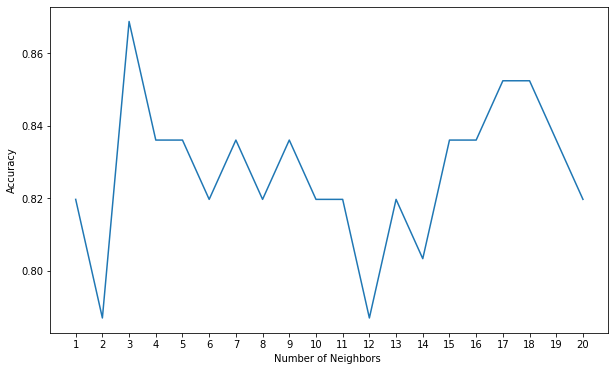

In [19]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [20]:
grid_params = { 'n_neighbors' : [13,16,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
print_score(g_res, X_train, y_train, X_test, y_test, train=True)
print_score(g_res, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Accuracy: 100.00
Roc_Auc Score: 100.00
Precision: 100.00
recall: 100.00
fl score: 100.00
Mcc Score: 1.00
Kappa score: 1.00


Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.892857   0.878788  0.885246   0.885823      0.885477
recall      0.862069   0.906250  0.885246   0.884159      0.885246
f1-score    0.877193   0.892308  0.885246   0.884750      0.885122
supp

[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.4s finished


#**SVM**

In [21]:
from sklearn.utils.fixes import scipy
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.551, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.551, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.542, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.542, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.796, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.9s finished


In [22]:
print_score(grid, X_train, y_train, X_test, y_test, train=True)
print_score(grid, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.864583    0.821918  0.838843    0.843251      0.841135
recall       0.761468    0.902256  0.838843    0.831862      0.838843
f1-score     0.809756    0.860215  0.838843    0.834986      0.837488
support    109.000000  133.000000  0.838843  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  26]
 [ 13 120]]

Accuracy: 83.88
Roc_Auc Score: 83.19
Precision: 82.19
recall: 90.23
fl score: 86.02
Mcc Score: 0.68
Kappa score: 0.67


Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.900000  0.868852   0.869355      0.870862
recall      0.896552   0.843750  0.868852   0.870151      0.868852
f1-score    0.866667  

#**Decision Tree**

In [23]:
dt = DecisionTreeClassifier(random_state=42)
# params = {
#     'min_impurity_decrease':[float(x) for x in np.linspace(0.1,1.0, num=10)],
#     'max_depth':[int(x) for x in np.linspace(2,100, num=98)],
#     'min_samples_leaf':[int(x) for x in np.linspace(5,100, num=95)],
#     'criterion': ["gini", "entropy"]
# }
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=2, n_jobs=-1,refit=True ,verbose=1,scoring = "accuracy")
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
# # print_score(grid_search, X_train, y_train, X_test, y_test, train=True)
# # print_score(grid_search, X_train, y_train, X_test, y_test, train=False)

Fitting 2 folds for each of 186200 candidates, totalling 372400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 13756 tasks      | elapsed:   33.5s


KeyboardInterrupt: ignored

In [24]:
params = {
    'min_impurity_decrease':[0.1],
    'max_depth':[2],
    'min_samples_leaf':[27],
    'criterion': [ "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=3, n_jobs=-1 ,verbose=1,scoring = "accuracy")
grid_search.fit(X_train, y_train)
print_score(grid_search, X_train, y_train, X_test, y_test, train=True)
print_score(grid_search, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Train Result:
Accuracy Score: 73.97%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.709091    0.765152  0.739669    0.737121      0.739901
recall       0.715596    0.759398  0.739669    0.737497      0.739669
f1-score     0.712329    0.762264  0.739669    0.737296      0.739773
support    109.000000  133.000000  0.739669  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 78  31]
 [ 32 101]]

Accuracy: 73.97
Roc_Auc Score: 73.75
Precision: 76.52
recall: 75.94
fl score: 76.23
Mcc Score: 0.47
Kappa score: 0.47


Test Result:
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.787879   0.892857  0.836066   0.840368      0.842949
recall      0.896552   0.781250  0.836066   0.838901      0.836066
f1-score    0.838710  

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished


#**Random Forest**

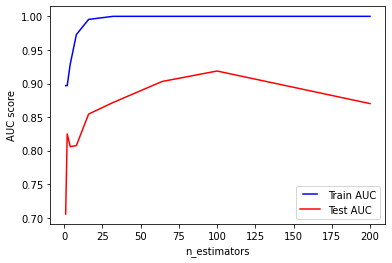

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'blue', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'red', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

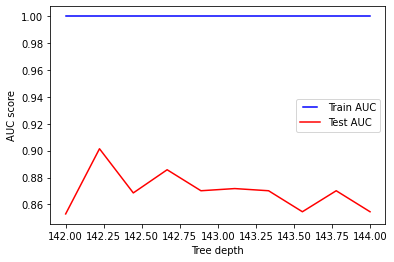

In [26]:
max_depths = np.linspace(142, 144,10 , endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'blue', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'red', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

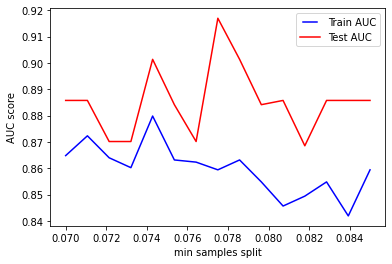

In [27]:
min_samples_splits = np.linspace(0.070, 0.085, 15, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'blue', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'red', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

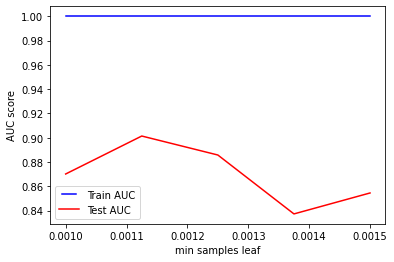

In [28]:
min_samples_leafs = np.linspace(0.0010, 0.0015, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

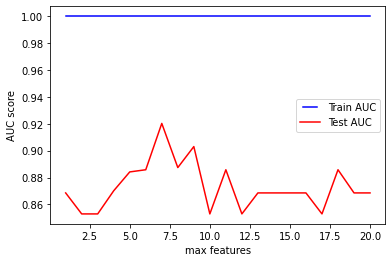

In [29]:
max_features = list(range(1,dataset.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [30]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=125, num=75)]
max_features = list(range(1,dataset.shape[1]))
max_depth = [143.75]

min_samples_split = [0.081]
min_samples_leaf = [0.0012]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=2,refit=True, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
print(rf_cv.best_score_)
print(rf_cv.best_estimator_)


Fitting 2 folds for each of 3000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3958 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5172 tasks      | elapsed:  7.7min


{'bootstrap': True, 'max_depth': 143.75, 'max_features': 8, 'min_samples_leaf': 0.0012, 'min_samples_split': 0.081, 'n_estimators': 51}
0.7520661157024794
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=143.75, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.0012, min_samples_split=0.081,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  8.9min finished


In [31]:
n_estimators = [51]
max_features = [8]
max_depth = [143.75]

min_samples_split = [0.081]
min_samples_leaf = [0.0012]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3,refit=True, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
print_score(rf_cv, X_train, y_train, X_test, y_test, train=True)
print_score(rf_cv, X_train, y_train, X_test, y_test, train=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Train Result:
Accuracy Score: 84.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.831776    0.851852  0.842975    0.841814      0.842809
recall       0.816514    0.864662  0.842975    0.840588      0.842975
f1-score     0.824074    0.858209  0.842975    0.841142      0.842834
support    109.000000  133.000000  0.842975  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 89  20]
 [ 18 115]]

Accuracy: 84.30
Roc_Auc Score: 84.06
Precision: 85.19
recall: 86.47
fl score: 85.82
Mcc Score: 0.68
Kappa score: 0.68


Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
                   0         1  accuracy  macro avg  weighted avg
precision   0.896552   0.90625  0.901639   0.901401      0.901639
recall      0.896552   0.90625  

[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished


#**Nueral Network**

In [32]:
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)



In [33]:
clf_grid.fit(X_train,y_train)


print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)


-----------------Original Features--------------------
Best score: 0.7730
Using the following parameters:
{'alpha': 0.001, 'hidden_layer_sizes': 5, 'max_iter': 500, 'random_state': 5, 'solver': 'lbfgs'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [34]:
parameters = {'solver': ['lbfgs'], 'max_iter': [500], 'alpha': [0.001], 'hidden_layer_sizes':[5], 'random_state':[5]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
clf_grid.fit(X_train,y_train)
print_score(clf_grid, X_train, y_train, X_test, y_test, train=True)
print_score(clf_grid, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.943925    0.940741  0.942149    0.942333      0.942175
recall       0.926606    0.954887  0.942149    0.940746      0.942149
f1-score     0.935185    0.947761  0.942149    0.941473      0.942097
support    109.000000  133.000000  0.942149  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[101   8]
 [  6 127]]

Accuracy: 94.21
Roc_Auc Score: 94.07
Precision: 94.07
recall: 95.49
fl score: 94.78
Mcc Score: 0.88
Kappa score: 0.88


Test Result:
Accuracy Score: 73.77%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.724138   0.75  0.737705   0.737069      0.737705
recall      0.724138   0.75  0.737705   0.737069      0.737705
f1-score    0.724138   0.75  0.737

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
